<a href="https://colab.research.google.com/github/ccbeltran/Talento_Tech/blob/main/Analisis_Confirmatorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42623 sha256=8f3a1350e87529abf6c76530bbb9fbedb51f93d5abf6282f6c714be6f429268d
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer


In [2]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer

In [3]:
# Obtener la URL del archivo de Excel en Google Drive
Ruta = '/content/Base1.xlsx'  # Reemplaza 'ID_DEL_ARCHIVO'

# Leer el archivo de Excel en un DataFrame
df = pd.read_excel(Ruta)
df.head(5)

,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,...,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29
0,19,Mujer,2,No,Menos de una vez al mes,1-2 bebidas,Celebraciones,"No, no tiene efecto",Nunca,No fumo,...,Nunca,Nunca,Algunas Veces,Algunas Veces,Casi Siempre,Algunas Veces,Rara vez,Siempre,Algunas Veces,Nunca
1,23,Hombre,9,No,Menos de una vez al mes,3-4 bebidas,"Socialización, Celebraciones","No, no tiene efecto",Nunca,No fumo,...,Nunca,Rara vez,Rara vez,Rara vez,Algunas Veces,Algunas Veces,Algunas Veces,Algunas Veces,Casi Siempre,Algunas Veces
2,20,Mujer,3,No,Una vez al mes,1-2 bebidas,"Socialización, Reducción de estrés, Celebraciones","No, no tiene efecto",Nunca,No fumo,...,Algunas Veces,Algunas Veces,Algunas Veces,Casi Siempre,Algunas Veces,Algunas Veces,Casi Siempre,Rara vez,Algunas Veces,Rara vez
3,19,Mujer,5,No,Varias veces al mes,1-2 bebidas,"Socialización, Reducción de estrés, Celebraciones","No, no tiene efecto",Nunca,No fumo,...,Algunas Veces,Rara vez,Algunas Veces,Rara vez,Casi Siempre,Rara vez,Rara vez,Rara vez,Algunas Veces,Rara vez
4,21,Hombre,8,Si,Una vez al mes,1-2 bebidas,Socialización,"No, no tiene efecto",Varias veces al mes,1-5 cigarrillos,...,Rara vez,Rara vez,Algunas Veces,Algunas Veces,Algunas Veces,Casi Siempre,Algunas Veces,Rara vez,Algunas Veces,Algunas Veces


In [4]:
# Opción: Eliminar columnas que no necesites para el análisis
df.drop(['Y1', 'Y2', 'Y3','Y4', 'Y5', 'Y6','Y7', 'Y8', 'Y9','Y10', 'Y11', 'Y12','Y13', 'Y14'], axis=1, inplace=True)

In [5]:
replacements = {
    'Siempre': 1,
    'Casi Siempre': 2,
    'Algunas Veces': 3,
    'Nunca': 4,
    'Rara vez': 5
}

for column in df.columns:
    df[column] = df[column].replace(replacements)

df

<ipython-input-5-54d3f10ed640>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(replacements)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29
0,4,3,3,1,1,3,3,1,1,5,...,4,4,3,3,2,3,5,1,3,4
1,5,2,2,2,2,5,3,2,5,3,...,4,5,5,5,3,3,3,3,2,3
2,3,2,3,2,3,3,2,2,5,3,...,3,3,3,2,3,3,2,5,3,5
3,3,2,5,3,2,2,3,2,3,5,...,3,5,3,5,2,5,5,5,3,5
4,2,1,3,2,3,3,5,2,3,5,...,5,5,3,3,3,2,3,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,5,3,5,2,3,3,3,3,3,5,...,4,5,3,5,4,3,3,3,3,4
122,4,3,3,3,3,3,3,3,5,5,...,5,5,4,3,4,5,5,5,5,4
123,4,2,5,5,5,3,5,5,3,5,...,4,4,4,3,5,3,4,2,2,5
124,3,2,3,5,5,3,3,3,5,5,...,5,5,3,3,5,5,1,5,5,5


In [6]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Prueba de esfericidad de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(f"Prueba de Bartlett:\nChi-cuadrado: {chi_square_value}, p-valor: {p_value}")

# Prueba KMO
kmo_all, kmo_model = calculate_kmo(df)
print(f"Prueba KMO: {kmo_model}")

Prueba de Bartlett:
Chi-cuadrado: 1173.4599463133572, p-valor: 1.2251811947140176e-75
Prueba KMO: 0.8019988743450082


In [7]:
from factor_analyzer import FactorAnalyzer
import pandas as pd

# Supongamos que ya has cargado tus datos en un DataFrame llamado df

# Inicializar el modelo de análisis factorial. Ajusta el número de factores según tu análisis.
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(df)

# Obtener comunalidades
comunalidades = fa.get_communalities()

# Crear un DataFrame para visualizar las comunalidades de cada variable
comunalidades_df = pd.DataFrame(comunalidades, index=df.columns, columns=['Comunalidad'])

print(comunalidades_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


     Comunalidad
X1      0.119182
X2      0.253781
X3      0.284050
X4      0.237382
X5      0.431864
X6      0.290893
X7      0.136890
X8      0.436072
X9      0.295395
X10     0.210626
X11     0.316909
X12     0.045746
X13     0.288407
X14     0.307409
X15     0.435740
X16     0.552763
X17     0.575207
X18     0.352612
X19     0.293038
X20     0.244174
X21     0.367085
X22     0.295023
X23     0.322629
X24     0.147103
X25     0.271707
X26     0.164748
X27     0.070148
X28     0.212736
X29     0.048904


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


    Autovalores Iniciales  Porcentaje de Varianza (%)  \
1                6.844844                   23.602910   
2                2.511277                    8.659576   
3                1.909415                    6.584191   
4                1.431963                    4.937804   
5                1.383345                    4.770157   
6                1.187434                    4.094599   
7                1.148658                    3.960889   
8                1.081206                    3.728298   
9                0.985773                    3.399216   
10               0.907614                    3.129703   
11               0.859962                    2.965385   
12               0.835757                    2.881922   
13               0.794512                    2.739696   
14               0.736053                    2.538115   
15               0.683528                    2.356993   
16               0.626601                    2.160694   
17               0.599454      

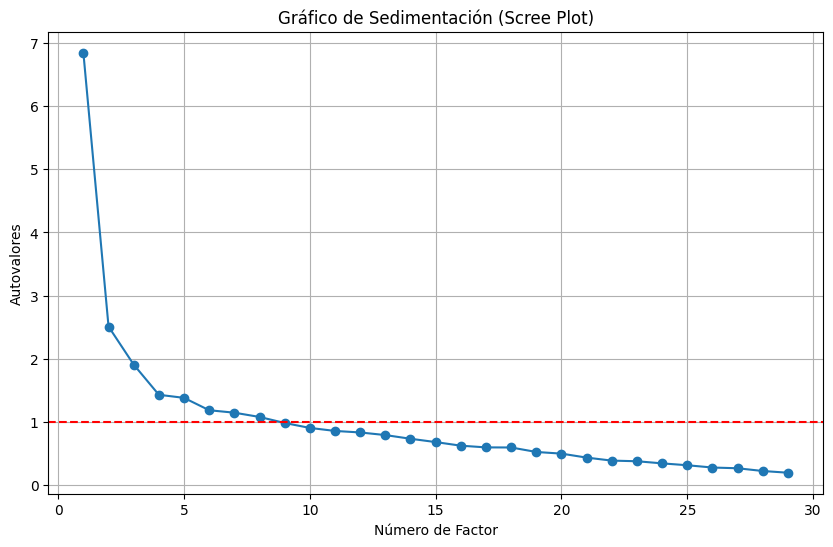

In [8]:
from factor_analyzer import FactorAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que ya has cargado tus datos en un DataFrame llamado df

# Inicializar el FactorAnalyzer sin rotación y con el número de factores igual al número de variables
# Esto es solo para obtener los autovalores iniciales, no para un análisis final
fa = FactorAnalyzer(rotation=None, n_factors=df.shape[1])
fa.fit(df)

# Obtener los autovalores
autovalores_iniciales, _ = fa.get_eigenvalues()

# Calcular el porcentaje de varianza explicada por cada autovalor
porcentaje_varianza = (autovalores_iniciales / sum(autovalores_iniciales)) * 100

# Calcular el porcentaje acumulado de varianza explicada
porcentaje_acumulado = porcentaje_varianza.cumsum()

# Crear un DataFrame para visualizar los resultados
autovalores_df = pd.DataFrame({
    'Autovalores Iniciales': autovalores_iniciales,
    'Porcentaje de Varianza (%)': porcentaje_varianza,
    'Porcentaje Acumulado (%)': porcentaje_acumulado
})
autovalores_df.index += 1  # Ajustar el índice para comenzar en 1

print(autovalores_df)

# Gráfico de Sedimentación (Scree Plot) para visualizar los autovalores
plt.figure(figsize=(10, 6))
plt.plot(autovalores_df.index, autovalores_df['Autovalores Iniciales'], marker='o')
plt.title('Gráfico de Sedimentación (Scree Plot)')
plt.xlabel('Número de Factor')
plt.ylabel('Autovalores')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [9]:
from factor_analyzer import FactorAnalyzer
import pandas as pd

# Supongamos que ya has cargado tus datos en un DataFrame llamado df
# y determinado el número correcto de factores (por ejemplo, n)

# Inicializar y ajustar el modelo de análisis factorial con el número correcto de factores
fa = FactorAnalyzer(n_factors=7, rotation='varimax')
fa.fit(df)

# Obtener varianza total explicada
# Retorna tres arrays: (1) la varianza de los factores, (2) las varianzas proporcionales, (3) la varianza acumulada
varianza, varianza_proporcional, varianza_acumulada = fa.get_factor_variance()

# Crear un DataFrame para visualizar la varianza explicada por cada factor y la varianza total explicada
varianza_df = pd.DataFrame({
    'Factor': [f'Factor {i+1}' for i in range(7)],
    'Varianza Explicada': varianza,
    'Varianza Proporcional (%)': varianza_proporcional*100,
    'Varianza Acumulada (%)': varianza_acumulada*100
})

print(varianza_df)

     Factor  Varianza Explicada  Varianza Proporcional (%)  \
0  Factor 1            4.014412                  13.842801   
1  Factor 2            2.443598                   8.426199   
2  Factor 3            1.901328                   6.556303   
3  Factor 4            1.622485                   5.594777   
4  Factor 5            1.149494                   3.963773   
5  Factor 6            1.097768                   3.785407   
6  Factor 7            0.769832                   2.654591   

   Varianza Acumulada (%)  
0               13.842801  
1               22.269001  
2               28.825304  
3               34.420080  
4               38.383853  
5               42.169260  
6               44.823851  


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [17]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

# Cargar datos
# Asegúrate de tener tu archivo CSV en el formato correcto o ajustar la ruta y el nombre del archivo según sea necesario.
# df = pd.read_csv('tu_archivo_de_datos.csv')



# Inicializar el Analizador Factorial
# Este ejemplo utiliza 5 factores y rota usando el método varimax.
fa = FactorAnalyzer(n_factors=4, rotation='varimax')

# Ajustar el modelo a tus datos
fa.fit(df)

# Obtener la carga factorial (Factor Loadings)
cargas = fa.loadings_
print("Cargas Factoriales:\n", cargas)

# Obtener varianza de cada factor
#varianza = fa.get_factor_variance()
#print("Varianza de los Factores:\n", varianza)

# Estos resultados te ayudarán a entender cuántos factores son adecuados para tus datos y cómo cada variable se relaciona con los factores.

Cargas Factoriales:
 [[ 0.13355362  0.14797925  0.3634556   0.02066827]
 [ 0.18145284  0.42584626  0.3178819  -0.00127008]
 [ 0.20102874  0.51134905  0.048833    0.22639539]
 [ 0.14108657  0.49777057  0.20920184  0.01936356]
 [ 0.13074583  0.85227421  0.04091483  0.14965709]
 [ 0.16795413  0.36134088  0.47738058  0.0183067 ]
 [ 0.05398391  0.1305508   0.54527296  0.01423169]
 [ 0.04044846  0.62524309  0.30328357  0.15032383]
 [ 0.454693    0.17253546  0.21781565  0.11017627]
 [ 0.43322517  0.07410962  0.10022324 -0.07857432]
 [ 0.31869009  0.09377832  0.62831972  0.05274282]
 [ 0.27544501  0.00505191 -0.10771035  0.29415331]
 [ 0.51571946  0.19070527  0.06789922  0.14888696]
 [ 0.40012198  0.13834326  0.38110264  0.09746414]
 [ 0.51986484  0.29240633  0.26218905  0.09660251]
 [ 0.77552745  0.02603844  0.07052529  0.04037546]
 [ 0.78118733  0.13162887  0.0734759   0.05273209]
 [ 0.54765241  0.21086297  0.12418245 -0.17305964]
 [ 0.42175461  0.05739462  0.38458405  0.09788588]
 [ 0.24483

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [18]:
# Nombres de las columnas (variables) de tu conjunto de datos original
nombres_columnas = df.columns

# Convertir cargas factoriales a un DataFrame
cargas_df = pd.DataFrame(fa.loadings_, index=nombres_columnas, columns=['Factor 1', 'Factor 2','Factor 3','Factor 4'])

# Mostrar el DataFrame de cargas factoriales
print("DataFrame de Cargas Factoriales:")
print(cargas_df)

DataFrame de Cargas Factoriales:
     Factor 1  Factor 2  Factor 3  Factor 4
X1   0.133554  0.147979  0.363456  0.020668
X2   0.181453  0.425846  0.317882 -0.001270
X3   0.201029  0.511349  0.048833  0.226395
X4   0.141087  0.497771  0.209202  0.019364
X5   0.130746  0.852274  0.040915  0.149657
X6   0.167954  0.361341  0.477381  0.018307
X7   0.053984  0.130551  0.545273  0.014232
X8   0.040448  0.625243  0.303284  0.150324
X9   0.454693  0.172535  0.217816  0.110176
X10  0.433225  0.074110  0.100223 -0.078574
X11  0.318690  0.093778  0.628320  0.052743
X12  0.275445  0.005052 -0.107710  0.294153
X13  0.515719  0.190705  0.067899  0.148887
X14  0.400122  0.138343  0.381103  0.097464
X15  0.519865  0.292406  0.262189  0.096603
X16  0.775527  0.026038  0.070525  0.040375
X17  0.781187  0.131629  0.073476  0.052732
X18  0.547652  0.210863  0.124182 -0.173060
X19  0.421755  0.057395  0.384584  0.097886
X20  0.244836  0.264485  0.263737  0.204111
X21  0.608049  0.065212  0.098636  0.046442

In [19]:
# Crear un DataFrame binario inicial con ceros
cargas_binarias_mayores_df = pd.DataFrame(0, index=cargas_df.index, columns=cargas_df.columns)

# Asignar 1 al factor con la mayor carga para cada variable
for index, row in cargas_df.iterrows(): # Change cargas_mayores_df to cargas_df
    # Find the factor with the maximum absolute loading for this variable
    factor_mayor_carga = row.abs().idxmax()
    cargas_binarias_mayores_df.loc[index, factor_mayor_carga] = 1

# Mostrar el DataFrame binario basado en la mayor carga
print("\nDataFrame Binario Basado en la Mayor Carga Factorial:")
print(cargas_binarias_mayores_df)


DataFrame Binario Basado en la Mayor Carga Factorial:
     Factor 1  Factor 2  Factor 3  Factor 4
X1          0         0         1         0
X2          0         1         0         0
X3          0         1         0         0
X4          0         1         0         0
X5          0         1         0         0
X6          0         0         1         0
X7          0         0         1         0
X8          0         1         0         0
X9          1         0         0         0
X10         1         0         0         0
X11         0         0         1         0
X12         0         0         0         1
X13         1         0         0         0
X14         1         0         0         0
X15         1         0         0         0
X16         1         0         0         0
X17         1         0         0         0
X18         1         0         0         0
X19         1         0         0         0
X20         0         1         0         0
X21         1        

In [20]:
# Crear un diccionario para almacenar las agrupaciones de variables por factor
agrupaciones = {factor: cargas_binarias_mayores_df.index[cargas_binarias_mayores_df[factor] == 1].tolist() for factor in cargas_binarias_mayores_df.columns}

# Mostrar el resumen de agrupaciones
print("\nAgrupaciones de Variables por Factor:")
for factor, variables in agrupaciones.items():
    print(f"{factor}: {variables}")


Agrupaciones de Variables por Factor:
Factor 1: ['X9', 'X10', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X21', 'X22', 'X23']
Factor 2: ['X2', 'X3', 'X4', 'X5', 'X8', 'X20']
Factor 3: ['X1', 'X6', 'X7', 'X11']
Factor 4: ['X12', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29']
